# Select first piece of paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 100
simulation_runs = 1000000
results = np.zeros(simulation_runs)
for i in range(simulation_runs):
    random_numbers = np.random.choice(range(1,101), n, replace=False)
    max = np.max(random_numbers)
    if max == random_numbers[0]:
        results[i] = 1
print(f"Probability of choosing correctly: {np.mean(results)}")

# Strategy 2 - 37% Rule
## Finding the optimal $k$ via simulation

In [6]:
def next_best_element_after_rejecting_k(k, random_numbers):
    max_in_first_k_objects = 0 if k == 0 else np.max(random_numbers[:k])
    for i in range(k, random_numbers.shape[0]):
        if random_numbers[i] > max_in_first_k_objects:
            return random_numbers[i]
    return random_numbers[-1]

In [13]:
# Takes like 45 mins to run

n = 100
simulation_runs = 1000000
row1 = np.arange(n+1)
row2 = np.zeros(n+1)
results = np.vstack([row1, row2])

for k in range(n+1):
    k_results = np.zeros(simulation_runs)
    for j in range(simulation_runs):
        random_numbers = np.random.choice(range(1,101), n, replace=False)
        max = np.max(random_numbers)
        chosen_num = next_best_element_after_rejecting_k(k, random_numbers)
        if chosen_num == max:
            k_results[j] = 1
    results[1][k] = np.mean(k_results)
results[0] /= n

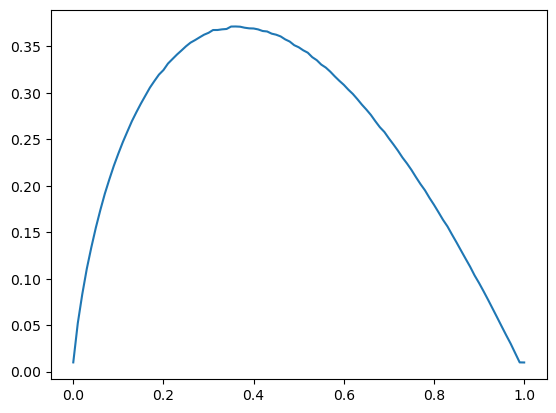

In [15]:

plt.plot(results[0], results[1])
plt.savefig("image.png")
plt.show()

In [16]:
results[0][np.argmax(results[1])]

0.36

In [17]:
plt.savefig("image.png")

<Figure size 640x480 with 0 Axes>